In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing Dataset
reviews = pd.read_excel('hotel_reviews.xlsx')
reviews.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
reviews.shape

(20491, 2)

In [4]:
reviews.Rating.describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [5]:
reviews.columns

Index(['Review', 'Rating'], dtype='object')

In [6]:
reviews['Rating'].unique()

array([4, 2, 3, 5, 1])

In [7]:
count =reviews.isnull().sum().sort_values(ascending=False)
count

Review    0
Rating    0
dtype: int64

In [8]:
reviews_f=reviews.copy()

In [9]:
#Number of Words
reviews_f['word_count'] = reviews_f['Review'].apply(lambda x: len(str(x).split(" ")))
reviews_f[['Review','word_count']].head()

,Review,word_count
0,nice hotel expensive parking got good deal sta...,89
1,ok nothing special charge diamond member hilto...,252
2,nice rooms not 4* experience hotel monaco seat...,219
3,"unique, great stay, wonderful time hotel monac...",91
4,"great stay great stay, went seahawk game aweso...",193


In [10]:
#Number of characters including space
reviews_f['char_count'] = reviews_f['Review'].str.len()
reviews_f[['Review','char_count']].head()

,Review,char_count
0,nice hotel expensive parking got good deal sta...,593
1,ok nothing special charge diamond member hilto...,1689
2,nice rooms not 4* experience hotel monaco seat...,1427
3,"unique, great stay, wonderful time hotel monac...",600
4,"great stay great stay, went seahawk game aweso...",1281


In [11]:
#Average Word Length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews_f['avg_word'] = reviews_f['Review'].apply(lambda x: avg_word(x))
reviews_f[['Review','avg_word']].head()


,Review,avg_word
0,nice hotel expensive parking got good deal sta...,5.804598
1,ok nothing special charge diamond member hilto...,5.752000
2,nice rooms not 4* experience hotel monaco seat...,5.571429
3,"unique, great stay, wonderful time hotel monac...",5.730337
4,"great stay great stay, went seahawk game aweso...",5.701571


In [12]:
#Number of stopwords
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

reviews_f['stopwords'] = reviews_f['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews_f[['Review','stopwords']].head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,stopwords
0,nice hotel expensive parking got good deal sta...,6
1,ok nothing special charge diamond member hilto...,12
2,nice rooms not 4* experience hotel monaco seat...,5
3,"unique, great stay, wonderful time hotel monac...",3
4,"great stay great stay, went seahawk game aweso...",11


In [13]:
#Number of special characters
import re
special_characters = "!@#$%^&*()-_+={}[]:;\"'<>,./\?|~`"

# Function to count words starting with special characters
def count_special_words(review):
    words = re.findall(r'\b[' + re.escape(special_characters) + r']\w*\b', str(review))
    return len(words)

# Apply the function to the 'Review' column
reviews_f['hashtags'] = reviews_f['Review'].apply(count_special_words)

# Display the 'Review' and 'hashtags' columns
reviews_f[['Review', 'hashtags']].head()


,Review,hashtags
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,6
2,nice rooms not 4* experience hotel monaco seat...,13
3,"unique, great stay, wonderful time hotel monac...",3
4,"great stay great stay, went seahawk game aweso...",6


In [14]:
#Number of numerics
reviews_f['numerics'] = reviews_f['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews_f[['Review','numerics']].head()

,Review,numerics
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,6
2,nice rooms not 4* experience hotel monaco seat...,7
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",2


In [15]:
#Number of Uppercase words
reviews_f['upper'] = reviews_f['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews_f[['Review','upper']].head()

,Review,upper
0,nice hotel expensive parking got good deal sta...,0
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",0
4,"great stay great stay, went seahawk game aweso...",0


In [16]:
reviews_f.columns

Index(['Review', 'Rating', 'word_count', 'char_count', 'avg_word', 'stopwords',
       'hashtags', 'numerics', 'upper'],
      dtype='object')

In [17]:
reviews_f.head()

,Review,Rating,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,nice hotel expensive parking got good deal sta...,4,89,593,5.804598,6,1,1,0
1,ok nothing special charge diamond member hilto...,2,252,1689,5.752000,12,6,6,0
2,nice rooms not 4* experience hotel monaco seat...,3,219,1427,5.571429,5,13,7,0
3,"unique, great stay, wonderful time hotel monac...",5,91,600,5.730337,3,3,1,0
4,"great stay great stay, went seahawk game aweso...",5,193,1281,5.701571,11,6,2,0


In [18]:
reviews_f.describe()

,Rating,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
count,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000
mean,3.952223,106.375043,725.245571,5.999689,3.572788,3.990825,1.884242,0.001074
std,1.233030,100.655267,689.933070,0.443135,4.661568,5.312188,2.890193,0.045262
min,1.000000,9.000000,44.000000,4.038462,0.000000,0.000000,0.000000,0.000000
25%,3.000000,50.000000,339.000000,5.704882,1.000000,1.000000,0.000000,0.000000
50%,4.000000,79.000000,537.000000,5.974522,2.000000,2.000000,1.000000,0.000000
75%,5.000000,126.000000,859.000000,6.264706,5.000000,5.000000,3.000000,0.000000
max,5.000000,1933.000000,13501.000000,8.666667,85.000000,108.000000,58.000000,4.000000


In [19]:
reviews_f

,Review,Rating,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,nice hotel expensive parking got good deal sta...,4,89,593,5.804598,6,1,1,0
1,ok nothing special charge diamond member hilto...,2,252,1689,5.752000,12,6,6,0
2,nice rooms not 4* experience hotel monaco seat...,3,219,1427,5.571429,5,13,7,0
3,"unique, great stay, wonderful time hotel monac...",5,91,600,5.730337,3,3,1,0
4,"great stay great stay, went seahawk game aweso...",5,193,1281,5.701571,11,6,2,0
...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,111,733,5.715596,2,6,1,0
20487,great location price view hotel great quick pl...,4,41,306,6.820513,0,4,0,0
20488,"ok just looks nice modern outside, desk staff ...",2,65,443,6.015873,2,3,0,0
20489,hotel theft ruined vacation hotel opened sept ...,1,783,5557,6.113956,27,32,12,0


In [20]:
#reviews_f['hashtags'].sum()
data=reviews_f.copy()
data1=data.drop(['Rating','Review'],axis=1)
data1.head()

,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,89,593,5.804598,6,1,1,0
1,252,1689,5.752000,12,6,6,0
2,219,1427,5.571429,5,13,7,0
3,91,600,5.730337,3,3,1,0
4,193,1281,5.701571,11,6,2,0


In [21]:
print("Total Stopwords present =", data1['stopwords'].sum())
print("Total hashtags present =",  data1['hashtags'].sum())
print("Total Numbers present =",   data1['numerics'].sum())
print("Total Uppercase present =",   data1['upper'].sum())

Total Stopwords present = 73210
Total hashtags present = 81776
Total Numbers present = 38610
Total Uppercase present = 22


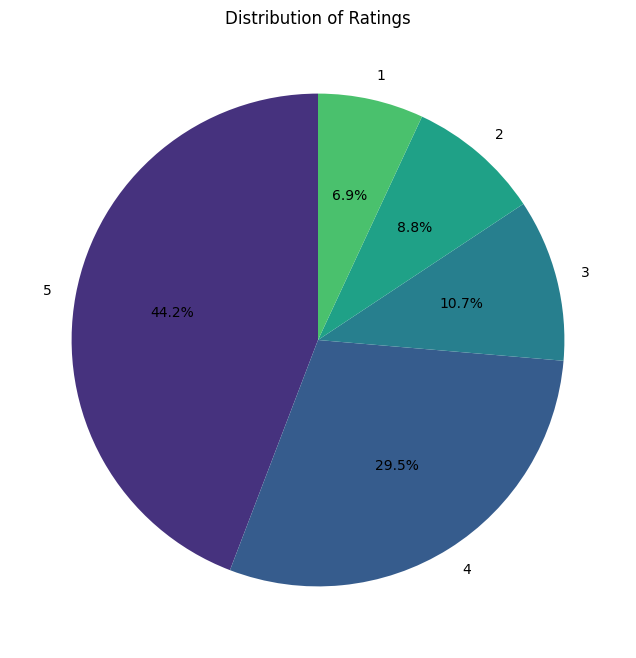

In [22]:
#Exploring the distribution of ratings:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of ratings using a pie chart
rating_counts = reviews['Rating'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Ratings')
plt.show()

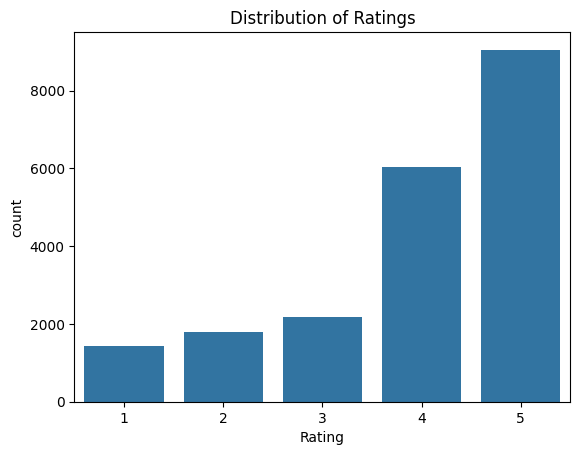

In [23]:
# Ploting the distribution of ratings
sns.countplot(x='Rating', data=reviews)
plt.title('Distribution of Ratings')
plt.show()

# Text Cleaning

In [24]:
reviews

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [25]:
reviews_df = reviews.sample(frac = 0.5, replace = False, random_state=42)

In [26]:
reviews_df

,Review,Rating
10726,not recommend hotel did reviewers actually sta...,1
14919,"barcelona rocks, stayed hotel jazz girlfriend ...",4
19098,ok hotel good location stayed night way beijin...,3
2450,great service nice pool ok beach lovely ground...,4
960,surprising treat spent weekend july 15/16 2006...,5
...,...,...
16444,great hotel husband spent week-end month park ...,4
6633,"great holidays, lovely holidays better expecte...",4
16825,amazing views stayed 3 adults 4 nights great t...,5
15931,excellent hotel beach standard westin nusa dua...,4


In [27]:
# remove 'No Negative' or 'No Positive' from text
reviews_df["Review"] = reviews_df["Review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

This can be useful when analyzing sentiment or text data where these phrases may not provide meaningful information.

Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database


In [28]:
import string

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [29]:
!python -m nltk.downloader averaged_perceptron_tagger

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
# return the wordnet object value corresponding to the POS tag

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [32]:
def clean_text(text):
    text = text.lower()                                                        # lower text
    text = [word.strip(string.punctuation) for word in text.split(" ")]        # tokenize text and remove puncutation
    text = [word for word in text if not any(c.isdigit() for c in word)]       # remove words that contain numbers
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]                                  # remove stop words
    text = [t for t in text if len(t) > 0]                                     # remove empty tokens
    pos_tags = pos_tag(text)                                                   # pos tag text
    text = [WordNetLemmatizer().lemmatize(t[0],
            get_wordnet_pos(t[1])) for t in pos_tags]                          # lemmatize text
    text = [t for t in text if len(t) > 1]                                     # remove words with only one letter
    text = " ".join(text) # join all
    return(text)

# clean text data
reviews_df["Review_clean"] = reviews_df["Review"].apply(lambda x: clean_text(x))

In [33]:
reviews_df

,Review,Rating,Review_clean
10726,not recommend hotel did reviewers actually sta...,1,recommend hotel reviewer actually stay hotel g...
14919,"barcelona rocks, stayed hotel jazz girlfriend ...",4,barcelona rock stay hotel jazz girlfriend nigh...
19098,ok hotel good location stayed night way beijin...,3,ok hotel good location stay night way beijing ...
2450,great service nice pool ok beach lovely ground...,4,great service nice pool ok beach lovely ground...
960,surprising treat spent weekend july 15/16 2006...,5,surprising treat spend weekend july cartwright...
...,...,...,...
16444,great hotel husband spent week-end month park ...,4,great hotel husband spend week-end month park ...
6633,"great holidays, lovely holidays better expecte...",4,great holiday lovely holiday well expect readi...
16825,amazing views stayed 3 adults 4 nights great t...,5,amaze view stay adult night great time bedroom...
15931,excellent hotel beach standard westin nusa dua...,4,excellent hotel beach standard westin nusa dua...


# Sentiment Analysis

In [34]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [35]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["Sentiments"] = reviews_df["Review_clean"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['Sentiments'], axis=1), reviews_df['Sentiments'].apply(pd.Series)], axis=1)

In [36]:
reviews_df

,Review,Rating,Review_clean,neg,neu,pos,compound
10726,not recommend hotel did reviewers actually sta...,1,recommend hotel reviewer actually stay hotel g...,0.223,0.490,0.286,0.5367
14919,"barcelona rocks, stayed hotel jazz girlfriend ...",4,barcelona rock stay hotel jazz girlfriend nigh...,0.129,0.686,0.185,0.9648
19098,ok hotel good location stayed night way beijin...,3,ok hotel good location stay night way beijing ...,0.000,0.572,0.428,0.9217
2450,great service nice pool ok beach lovely ground...,4,great service nice pool ok beach lovely ground...,0.057,0.631,0.313,0.9982
960,surprising treat spent weekend july 15/16 2006...,5,surprising treat spend weekend july cartwright...,0.043,0.644,0.313,0.9816
...,...,...,...,...,...,...,...
16444,great hotel husband spent week-end month park ...,4,great hotel husband spend week-end month park ...,0.018,0.562,0.419,0.9806
6633,"great holidays, lovely holidays better expecte...",4,great holiday lovely holiday well expect readi...,0.045,0.623,0.333,0.9994
16825,amazing views stayed 3 adults 4 nights great t...,5,amaze view stay adult night great time bedroom...,0.041,0.450,0.509,0.9916
15931,excellent hotel beach standard westin nusa dua...,4,excellent hotel beach standard westin nusa dua...,0.048,0.608,0.345,0.9846


In [37]:
reviews_df.describe()

,Rating,neg,neu,pos,compound
count,10246.000000,10246.000000,10246.000000,10246.000000,10246.000000
mean,3.949541,0.063107,0.604523,0.332372,0.852566
std,1.233141,0.061664,0.103579,0.123313,0.378342
min,1.000000,0.000000,0.201000,0.000000,-0.990900
25%,3.000000,0.019000,0.541000,0.249250,0.937100
50%,4.000000,0.050000,0.611000,0.328000,0.977400
75%,5.000000,0.090000,0.673000,0.409000,0.990000
max,5.000000,0.673000,1.000000,0.799000,0.999900


In [38]:
def classify_sentiment(compound_score):
    if compound_score > 0.5:
        return 'Positive'
    elif compound_score < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

reviews_df['Sentiment'] = reviews_df['compound'].apply(classify_sentiment)

In [39]:
order = ['Review','Review_clean','Rating','pos','neu','neg','compound','Sentiment']
reviews_df = reviews_df[order]


In [40]:
reviews_df

,Review,Review_clean,Rating,pos,neu,neg,compound,Sentiment
10726,not recommend hotel did reviewers actually sta...,recommend hotel reviewer actually stay hotel g...,1,0.286,0.490,0.223,0.5367,Positive
14919,"barcelona rocks, stayed hotel jazz girlfriend ...",barcelona rock stay hotel jazz girlfriend nigh...,4,0.185,0.686,0.129,0.9648,Positive
19098,ok hotel good location stayed night way beijin...,ok hotel good location stay night way beijing ...,3,0.428,0.572,0.000,0.9217,Positive
2450,great service nice pool ok beach lovely ground...,great service nice pool ok beach lovely ground...,4,0.313,0.631,0.057,0.9982,Positive
960,surprising treat spent weekend july 15/16 2006...,surprising treat spend weekend july cartwright...,5,0.313,0.644,0.043,0.9816,Positive
...,...,...,...,...,...,...,...,...
16444,great hotel husband spent week-end month park ...,great hotel husband spend week-end month park ...,4,0.419,0.562,0.018,0.9806,Positive
6633,"great holidays, lovely holidays better expecte...",great holiday lovely holiday well expect readi...,4,0.333,0.623,0.045,0.9994,Positive
16825,amazing views stayed 3 adults 4 nights great t...,amaze view stay adult night great time bedroom...,5,0.509,0.450,0.041,0.9916,Positive
15931,excellent hotel beach standard westin nusa dua...,excellent hotel beach standard westin nusa dua...,4,0.345,0.608,0.048,0.9846,Positive


Positive    9422
Neutral      456
Negative     368
Name: Sentiment, dtype: int64


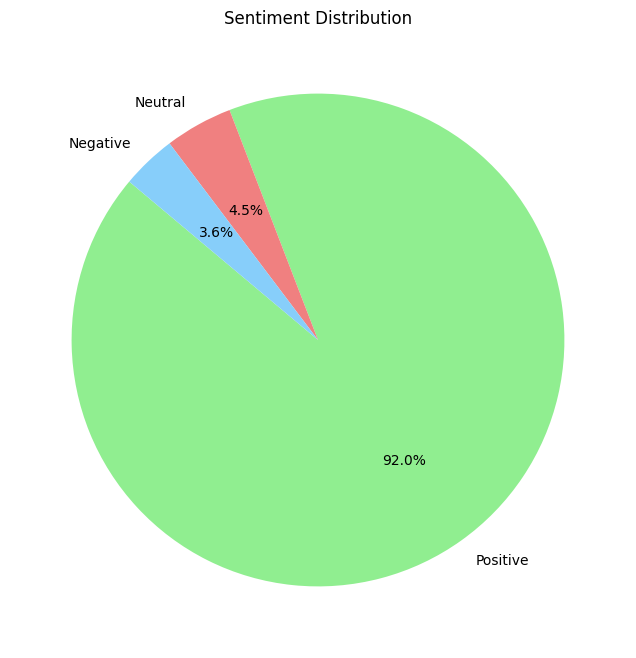

In [41]:
sentiment_counts = reviews_df['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Sentiment Distribution')
print(sentiment_counts)
# Show the plot
plt.show()

# Wordcloud

In [42]:
! pip install wordcloud


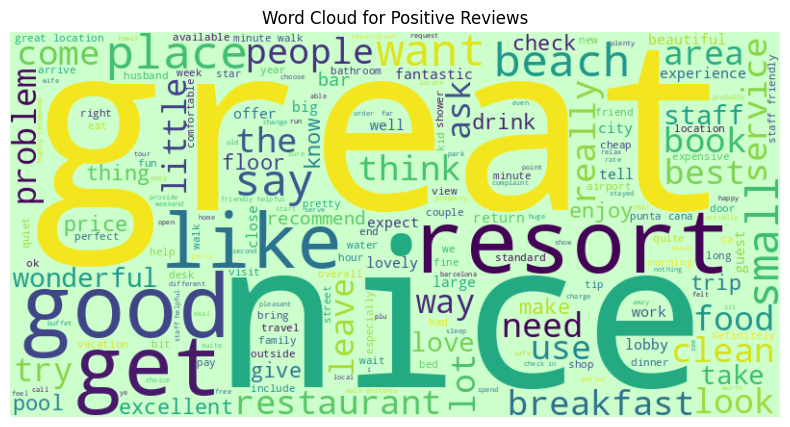

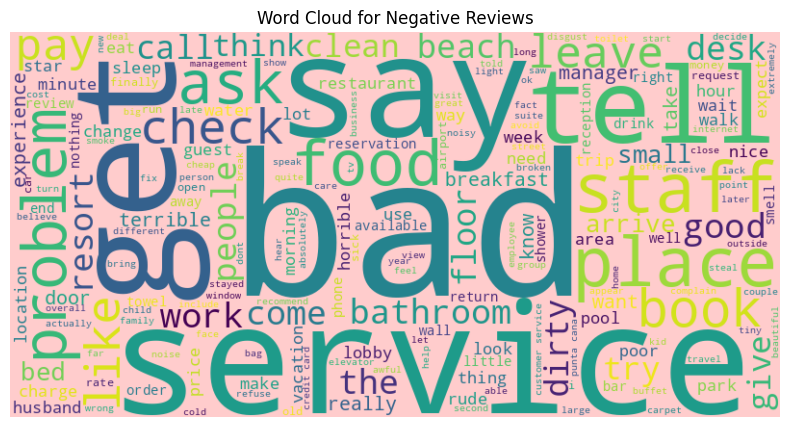

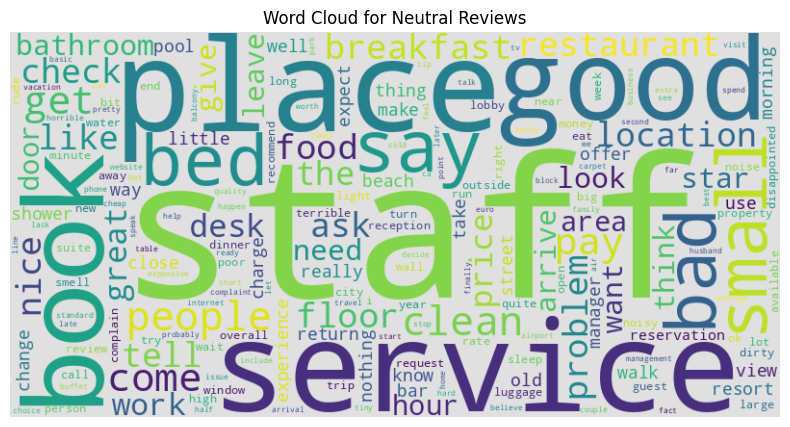

In [43]:
from wordcloud import WordCloud

# Custom stop words
custom_stopwords = set(['day', 'night', 'room', 'time','hotel','stay','go',"n't"])  # Add your custom stop words here

# Function to generate and display word cloud with custom color
def generate_wordcloud(text, title, color):
    wordcloud = WordCloud(width=800, height=400, background_color=color, stopwords=custom_stopwords).generate(text)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Positive reviews
positive_text = ' '.join(reviews_df[reviews_df['Sentiment'] == 'Positive']['Review_clean'])
generate_wordcloud(positive_text, 'Word Cloud for Positive Reviews', '#CCFFCC')

# Negative reviews
negative_text = ' '.join(reviews_df[reviews_df['Sentiment'] == 'Negative']['Review_clean'])
generate_wordcloud(negative_text, 'Word Cloud for Negative Reviews', '#FFCCCC')

# Neutral reviews
neutral_text = ' '.join(reviews_df[reviews_df['Sentiment'] == 'Neutral']['Review_clean'])
generate_wordcloud(neutral_text, 'Word Cloud for Neutral Reviews', '#E0E0E0')

# Feature Engineering

In [44]:
from sklearn.utils import resample

positive_reviews = reviews_df[reviews_df['Sentiment'] == 'Positive']
negative_reviews = reviews_df[reviews_df['Sentiment'] == 'Negative']
neutral_reviews = reviews_df[reviews_df['Sentiment'] == 'Neutral']
print(f"Number of positive reviews: {len(positive_reviews)}")
print(f"Number of negative reviews: {len(negative_reviews)}")
print(f"Number of neutral reviews: {len(neutral_reviews)}")



Number of positive reviews: 9422
Number of negative reviews: 368
Number of neutral reviews: 456


In [45]:
# Sample a subset from the majority class (Negative)
negative_downsampled = resample(negative_reviews, replace=True,
                                n_samples=len(positive_reviews) + len(neutral_reviews),
                                random_state=42)

# Combine downsampled majority class with minority classes
balanced_df = pd.concat([negative_downsampled, positive_reviews, neutral_reviews])

#Checking Count of balance data
sentiment_counts1 = balanced_df['Sentiment'].value_counts()
sentiment_counts1

Negative    9878
Positive    9422
Neutral      456
Name: Sentiment, dtype: int64

In [46]:
# Combine downsampled majority class with minority classes
balanced_df = pd.concat([negative_downsampled, positive_reviews, neutral_reviews])

In [47]:
balanced_df

,Review,Review_clean,Rating,pos,neu,neg,compound,Sentiment
8596,customer service bad not recommend booked onli...,customer service bad recommend book online use...,1,0.126,0.668,0.206,-0.9511,Negative
20214,"n't, chose hotel looked luxurious wanted nice ...",n't chose hotel look luxurious wanted nice con...,1,0.102,0.724,0.174,-0.5673,Negative
3316,"not bad, not bad hotel needs renovation beach ...",bad bad hotel need renovation beach pool good ...,3,0.153,0.476,0.370,-0.6249,Negative
2498,"terrible service n't stay, friend decided stay...",terrible service n't stay friend decided stay ...,1,0.094,0.610,0.295,-0.9909,Negative
11071,"yuck, travel agent apparently did n't make dif...",yuck travel agent apparently n't make room bug...,1,0.114,0.720,0.166,-0.5615,Negative
...,...,...,...,...,...,...,...,...
12304,horrible enjoy staying 1950 hostel paying 2007...,horrible enjoy stay hostel pay price love plac...,1,0.158,0.587,0.255,-0.4728,Neutral
11416,"dug shining dug shining hotel, civil war vinta...",dug shin dug shin hotel civil war vintage orph...,4,0.158,0.705,0.136,0.3453,Neutral
5914,average place average stay stayed hotel night ...,average place average stay stayed hotel night ...,3,0.147,0.733,0.121,0.3612,Neutral
3773,horrible avoid costs bummer looked great websi...,horrible avoid cost bummer look great website ...,1,0.228,0.527,0.244,0.0258,Neutral


In [48]:
sentiment_counts1 = balanced_df['Sentiment'].value_counts()
sentiment_counts1


Negative    9878
Positive    9422
Neutral      456
Name: Sentiment, dtype: int64

Negative    9878
Positive    9422
Neutral      456
Name: Sentiment, dtype: int64


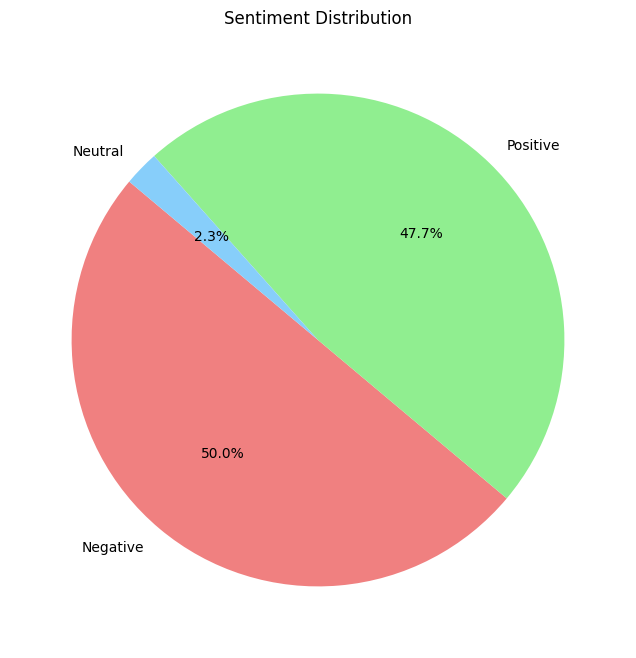

In [49]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts1, labels=sentiment_counts1.index, autopct='%1.1f%%', startangle=140, colors=[ 'lightcoral','lightgreen', 'lightskyblue'])
plt.title('Sentiment Distribution')
print(sentiment_counts1)
# Show the plot
plt.show()

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the cleaned reviews
X = tfidf_vectorizer.fit_transform(balanced_df['Review_clean'])

# Get the target variable
y = balanced_df['Sentiment']

le = LabelEncoder()
y = le.fit_transform(y)


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
print(type(X_train))
print(type(y_train))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>


In [53]:
!pip install scipy

In [54]:
import scipy
X_train = scipy.sparse.csr_matrix.toarray(X_train)



In [55]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

In [56]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),XGBClassifier(),LGBMClassifier(),MultinomialNB(),BernoulliNB(),AdaBoostClassifier()]
results=pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])
for model in models:
  model_name=model.__class__.__name__
  model.fit(X_train,y_train)
  train_predictions=model.predict(X_train)
  test_predictions=model.predict(X_test)
  train_accuracy=accuracy_score(y_train,train_predictions)
  test_accuracy=accuracy_score(y_test,test_predictions)

  results = results.append({'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }, ignore_index=True)
  print(f'Classification Report {model_name}')
  print(classification_report(y_test,test_predictions))
  print('===========================================================================================')



<ipython-input-56-7ab9d1b89b48>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


Classification Report DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1988
           1       0.10      0.07      0.08        90
           2       0.97      0.94      0.95      1874

    accuracy                           0.95      3952
   macro avg       0.67      0.67      0.67      3952
weighted avg       0.94      0.95      0.94      3952



<ipython-input-56-7ab9d1b89b48>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set t

Classification Report RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       0.00      0.00      0.00        90
           2       0.96      1.00      0.98      1874

    accuracy                           0.98      3952
   macro avg       0.65      0.67      0.66      3952
weighted avg       0.95      0.98      0.97      3952



<ipython-input-56-7ab9d1b89b48>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set t

Classification Report KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1988
           1       0.00      0.00      0.00        90
           2       0.96      0.96      0.96      1874

    accuracy                           0.96      3952
   macro avg       0.64      0.65      0.65      3952
weighted avg       0.94      0.96      0.95      3952



<ipython-input-56-7ab9d1b89b48>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set t

Classification Report XGBClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1988
           1       0.02      1.00      0.04        90
           2       0.00      0.00      0.00      1874

    accuracy                           0.02      3952
   macro avg       0.01      0.33      0.01      3952
weighted avg       0.00      0.02      0.00      3952

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.955632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178338
[LightGBM] [Info] Number of data points in the train set: 15804, number of used features: 4911
[LightGBM] [Info] Start training from score -0.694667
[LightGBM] [Info] Start training from score -3.765385
[LightGBM] [Info] Start training from score -0.738980


<ipython-input-56-7ab9d1b89b48>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


Classification Report LGBMClassifier
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1988
           1       0.50      0.06      0.10        90
           2       0.97      0.98      0.98      1874

    accuracy                           0.97      3952
   macro avg       0.81      0.68      0.69      3952
weighted avg       0.96      0.97      0.96      3952



<ipython-input-56-7ab9d1b89b48>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set t

Classification Report MultinomialNB
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1988
           1       0.00      0.00      0.00        90
           2       0.96      0.97      0.96      1874

    accuracy                           0.95      3952
   macro avg       0.64      0.65      0.64      3952
weighted avg       0.93      0.95      0.94      3952



<ipython-input-56-7ab9d1b89b48>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


Classification Report BernoulliNB
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1988
           1       0.20      0.19      0.19        90
           2       0.96      0.94      0.95      1874

    accuracy                           0.94      3952
   macro avg       0.70      0.70      0.70      3952
weighted avg       0.94      0.94      0.94      3952

Classification Report AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1988
           1       0.33      0.01      0.02        90
           2       0.96      0.94      0.95      1874

    accuracy                           0.94      3952
   macro avg       0.74      0.64      0.64      3952
weighted avg       0.93      0.94      0.93      3952



<ipython-input-56-7ab9d1b89b48>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


In [57]:
results['Rank']=results['Test Accuracy'].rank(ascending=False)
print(results)

                    Model  Train Accuracy  Test Accuracy  Rank
0  DecisionTreeClassifier        1.000000       0.948381   5.0
1  RandomForestClassifier        1.000000       0.976215   1.0
2    KNeighborsClassifier        0.967413       0.958249   3.0
3           XGBClassifier        0.999177       0.022773   8.0
4          LGBMClassifier        1.000000       0.970142   2.0
5           MultinomialNB        0.954948       0.953188   4.0
6             BernoulliNB        0.952733       0.936994   7.0
7      AdaBoostClassifier        0.941850       0.939271   6.0


In [58]:
'''from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Hyperparameter tuning for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters for RandomForestClassifier
best_params_rf = grid_search_rf.best_params_
print("RandomForestClassifier Best Parameters:", best_params_rf)'''

'from sklearn.model_selection import GridSearchCV, train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\n\n# Hyperparameter tuning for RandomForestClassifier\nparam_grid_rf = {\n    \'n_estimators\': [50, 100],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\nrf_model = RandomForestClassifier(random_state=42)\ngrid_search_rf = GridSearchCV(rf_model, param_grid=param_grid_rf, cv=5, scoring=\'accuracy\')\ngrid_search_rf.fit(X_train, y_train)\n\n# Get the best parameters for RandomForestClassifier\nbest_params_rf = grid_search_rf.best_params_\nprint("RandomForestClassifier Best Parameters:", best_params_rf)'

In [59]:
# Train the RandomForestClassifier with the best parameters
best_rf_model = RandomForestClassifier(random_state=42,max_depth = None, min_samples_leaf = 1, min_samples_split = 5, n_estimators=100)
best_rf_model.fit(X_train, y_train)

# Evaluate on the test set
rf_test_predictions = best_rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)

# Print the results
print("RandomForestClassifier Test Accuracy:", rf_test_accuracy)

RandomForestClassifier Test Accuracy: 0.9764676113360324


In [60]:
rf_test_predictions

array([2, 2, 2, ..., 0, 2, 2])

###RandomForestClassifier Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier Test Accuracy: 0.9764676113360324

In [61]:
'''from sklearn.model_selection import GridSearchCV, train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score


# Hyperparameter tuning for LGBMClassifier
param_grid_lgbm = {
    'n_estimators': [100],
    'max_depth': [None],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50,100]
}

lgbm_model = LGBMClassifier(random_state=42)
grid_search_lgbm = GridSearchCV(lgbm_model, param_grid=param_grid_lgbm, cv=5, scoring='accuracy')
grid_search_lgbm.fit(X_train, y_train)

# Get the best parameters for LGBMClassifier
best_params_lgbm = grid_search_lgbm.best_params_

# Train the LGBMClassifier with the best parameters
best_lgbm_model = LGBMClassifier(random_state=42, **best_params_lgbm)
best_lgbm_model.fit(X_train, y_train)

# Evaluate on the test set
lgbm_test_predictions = best_lgbm_model.predict(X_test)
lgbm_test_accuracy = accuracy_score(y_test, lgbm_test_predictions)

# Print the results
print("\nLGBMClassifier Best Parameters:", best_params_lgbm)
print("LGBMClassifier Test Accuracy:", lgbm_test_accuracy)'''


'from sklearn.model_selection import GridSearchCV, train_test_split\nfrom lightgbm import LGBMClassifier\nfrom sklearn.metrics import accuracy_score\n\n\n# Hyperparameter tuning for LGBMClassifier\nparam_grid_lgbm = {\n    \'n_estimators\': [100],\n    \'max_depth\': [None],\n    \'learning_rate\': [0.01, 0.1],\n    \'num_leaves\': [31, 50,100]\n}\n\nlgbm_model = LGBMClassifier(random_state=42)\ngrid_search_lgbm = GridSearchCV(lgbm_model, param_grid=param_grid_lgbm, cv=5, scoring=\'accuracy\')\ngrid_search_lgbm.fit(X_train, y_train)\n\n# Get the best parameters for LGBMClassifier\nbest_params_lgbm = grid_search_lgbm.best_params_\n\n# Train the LGBMClassifier with the best parameters\nbest_lgbm_model = LGBMClassifier(random_state=42, **best_params_lgbm)\nbest_lgbm_model.fit(X_train, y_train)\n\n# Evaluate on the test set\nlgbm_test_predictions = best_lgbm_model.predict(X_test)\nlgbm_test_accuracy = accuracy_score(y_test, lgbm_test_predictions)\n\n# Print the results\nprint("\nLGBMClassi

#LGBMClassifier Best Parameters: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100, 'num_leaves': 100}
LGBMClassifier Test Accuracy: 0.9744433198380567

In [62]:
'''from sklearn.svm import SVC
# Hyperparameter tuning for Support Vector Machine (SVM)
param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(random_state=42)
grid_search_svm = GridSearchCV(svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best parameters for SVM
best_params_svm = grid_search_svm.best_params_

# Train the SVM with the best parameters
best_svm_model = SVC(random_state=42, **best_params_svm)
best_svm_model.fit(X_train, y_train)

# Evaluate on the test set
svm_test_predictions = best_svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)

# Print the results
print("\nSVM Best Parameters:", best_params_svm)
print("SVM Test Accuracy:", svm_test_accuracy)'''

'from sklearn.svm import SVC\n# Hyperparameter tuning for Support Vector Machine (SVM)\nparam_grid_svm = {\n    \'C\': [0.1, 1],\n    \'kernel\': [\'linear\', \'rbf\'],\n    \'gamma\': [\'scale\', \'auto\']\n}\n\nsvm_model = SVC(random_state=42)\ngrid_search_svm = GridSearchCV(svm_model, param_grid=param_grid_svm, cv=5, scoring=\'accuracy\')\ngrid_search_svm.fit(X_train, y_train)\n\n# Get the best parameters for SVM\nbest_params_svm = grid_search_svm.best_params_\n\n# Train the SVM with the best parameters\nbest_svm_model = SVC(random_state=42, **best_params_svm)\nbest_svm_model.fit(X_train, y_train)\n\n# Evaluate on the test set\nsvm_test_predictions = best_svm_model.predict(X_test)\nsvm_test_accuracy = accuracy_score(y_test, svm_test_predictions)\n\n# Print the results\nprint("\nSVM Best Parameters:", best_params_svm)\nprint("SVM Test Accuracy:", svm_test_accuracy)'

In [63]:
'''from scipy import sparse as sp
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your data is stored in X_train, y_train, X_test, y_test
# Set specific values for SVM hyperparameters
svm_params = {
    'C': 1,
    'kernel': 'rbf',
    'gamma': 'scale'
}

# Train the SVM with the specified parameters
svm_model = SVC(random_state=42, **svm_params)
svm_model.fit(X_train, y_train)

# Ensure X_test is in dense format if the model was trained on dense data
if sp.issparse(X_test):
    X_test = X_test.toarray()

# Evaluate on the test set
svm_test_predictions = svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)

# Print the results
print("\nSVM Parameters:", svm_params)
print("SVM Test Accuracy:", svm_test_accuracy)'''


'from scipy import sparse as sp\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import accuracy_score\n\n# Assuming your data is stored in X_train, y_train, X_test, y_test\n# Set specific values for SVM hyperparameters\nsvm_params = {\n    \'C\': 1,\n    \'kernel\': \'rbf\',\n    \'gamma\': \'scale\'\n}\n\n# Train the SVM with the specified parameters\nsvm_model = SVC(random_state=42, **svm_params)\nsvm_model.fit(X_train, y_train)\n\n# Ensure X_test is in dense format if the model was trained on dense data\nif sp.issparse(X_test):\n    X_test = X_test.toarray()\n\n# Evaluate on the test set\nsvm_test_predictions = svm_model.predict(X_test)\nsvm_test_accuracy = accuracy_score(y_test, svm_test_predictions)\n\n# Print the results\nprint("\nSVM Parameters:", svm_params)\nprint("SVM Test Accuracy:", svm_test_accuracy)'

In [64]:
'''svm_params = {
    'C': 0.1,
    'kernel': 'rbf',
    'gamma': 'scale'
}

# Train the SVM with the specified parameters
svm_model = SVC(random_state=42, **svm_params)
svm_model.fit(X_train, y_train)

# Ensure X_test is in dense format if the model was trained on dense data
if sp.issparse(X_test):
    X_test = X_test.toarray()

# Evaluate on the test set
svm_test_predictions = svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)

# Print the results
print("\nSVM Parameters:", svm_params)
print("SVM Test Accuracy:", svm_test_accuracy)'''

'svm_params = {\n    \'C\': 0.1,\n    \'kernel\': \'rbf\',\n    \'gamma\': \'scale\'\n}\n\n# Train the SVM with the specified parameters\nsvm_model = SVC(random_state=42, **svm_params)\nsvm_model.fit(X_train, y_train)\n\n# Ensure X_test is in dense format if the model was trained on dense data\nif sp.issparse(X_test):\n    X_test = X_test.toarray()\n\n# Evaluate on the test set\nsvm_test_predictions = svm_model.predict(X_test)\nsvm_test_accuracy = accuracy_score(y_test, svm_test_predictions)\n\n# Print the results\nprint("\nSVM Parameters:", svm_params)\nprint("SVM Test Accuracy:", svm_test_accuracy)'

#### SVM shows 97% accuracy with SVM Parameters: {'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}

####Random Forest

In [65]:
best_params_rf = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
rf_model = RandomForestClassifier(**best_params_rf)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5)

In [66]:
# Random Forest
accuracy_rf = accuracy_score(y_test, rf_test_predictions)
print("Accuracy - Random Forest:", accuracy_rf)

Accuracy - Random Forest: 0.9764676113360324


In [67]:
print(classification_report(y_test, rf_test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       0.00      0.00      0.00        90
           2       0.96      1.00      0.98      1874

    accuracy                           0.98      3952
   macro avg       0.65      0.67      0.66      3952
weighted avg       0.95      0.98      0.97      3952



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Pickling the model

In [68]:
import pickle

In [69]:
filename = 'rf_model.sav'

In [70]:
pickle.dump(rf_model, open(filename, 'wb'))

In [71]:
load_model = pickle.load(open(filename, 'rb'))

In [72]:
model_score_rf= load_model.score(X_test, y_test)

In [73]:
model_score_rf

0.9767206477732794